# Mobile Laser Scanning in an Urban Scene with Moving Vehicles

Notebook: Hannah Weiser, 2023

This is a demonstration of scanning a scene with dynamic scene parts (vehicles), which perform rigid motions. The sensor for this simulation is also mounted on a moving platform, thereby mimicing an urban mobile laser scanning (MLS) campaign.

We will use the command-line access of HELIOS++ to run the simulation, and use Python just for displaying the input XMLs and the resulting point clouds.

In [1]:
import sys, os
from pathlib import Path
from IPython.display import Code

current_folder = globals()['_dh'][0]
helios_path = str(Path(current_folder).parent)
sys.path.append(helios_path)  # add helios-plusplus directory to PATH
import pyhelios

from pyhelios.util.xmldisplayer import display_xml, find_playback_dir

os.chdir(helios_path)

## Scene

The base scene (terrain and urban environment) was generated with the [Blosm](https://github.com/vvoovv/blosm) add-on for Blender. To this scene, cars were added and animated, so that they are driving between 20 and 30 km/h. The animations of the cars were then baked (i.e., keyframes were inserted in regular intervals, here every 2 frames) and the scene was exported with the [dyn_b2h](https://github.com/3dgeo-heidelberg/dyn_b2h) add-on. As the frame rate in the Blender simulation is 24 fps, a dynamic time step of 0.08333 s was selected for each 2-frame motion, so that one second in Blender corresponds to one second in the HELIOS++ scene.

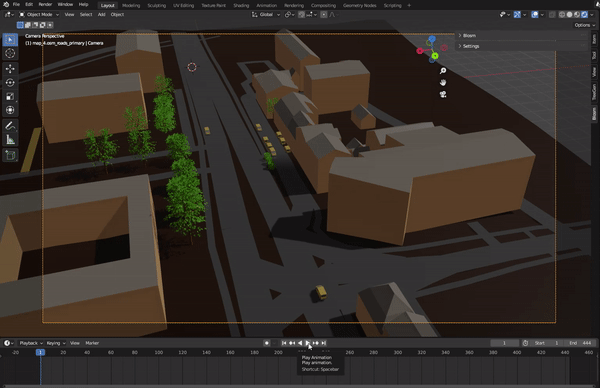

Finally, further modifications were made: 
- instead of loading the same models from different OBJ files (with different position/orientation), similar objects were loaded from the same OBJ file and then transformed using XML syntax.
- Wavefront material template library (MTL) files were modified so they contain a `helios_classification` to create an automatic classification of the output point cloud.

Have a look at the scene [here](https://github.com/3dgeo-heidelberg/helios/blob/dev/data/scenes/dyn/urban_dyn_scene.xml) or uncomment the line below.

In [2]:
# Code(display_xml('data/scenes/dyn/urban_dyn_scene.xml'), language='XML')

## Platform and Scanner

For this simulation, we are using the `velodyne HDL-64e`, a multi-channel LiDAR which is frequently used in mobile laser scanning applications. It is mounted on a ground vehicle. Scanner and platform are shown below.

In [3]:
Code(display_xml('data/scanners_tls.xml', 'velodyne_hdl-64e'), language='XML')

<scanner id="velodyne_hdl-64e" accuracy_m="0.02" beamDivergence_rad="0.0007" name="Velodyne HDL-64E" optics="rotating" pulseFreqs_Hz="20312" pulseLength_ns="10" rangeMin_m="0.0100" rangeMax_m="120" scanAngleMax_deg="1" scanAngleEffectiveMax_deg="1" scanFreqMin_Hz="0" scanFreqMax_Hz="0" wavelength_nm="905" maxNOR="1" headRotatePerSecMax_deg="5250">

		<FWFSettings beamSampleQuality="1" />	<!-- set to one for fast simulations -->
		<channels>
			<channel id="0">
				<beamOrigin x="0" y="0" z="0">
					<rot axis="x" angle_deg="-24.8" />
				</beamOrigin>
			</channel>
            <channel id="1">
				<beamOrigin x="0" y="0" z="0">
					<rot axis="x" angle_deg="-24.375" />
				</beamOrigin>
			</channel>
            <channel id="2">
				<beamOrigin x="0" y="0" z="0">
					<rot axis="x" angle_deg="-23.949" />
				</beamOrigin>
			</channel>
            <channel id="3">
				<beamOrigin x="0" y="0" z="0">
					<rot axis="x" angle_deg="-23.524" />
				</beamOrigin>
			</channel>
            <channel id="4">
				<beamOrigin x="0" y="0" z="0">
					<rot axis="x" angle_deg="-23.098" />
				</beamOrigin>
			</channel>
            <channel id="5">
				<beamOrigin x="0" y="0" z="0">
					<rot axis="x" angle_deg="-22.673" />
				</beamOrigin>
			</channel>
            <channel id="6">
				<beamOrigin x="0" y="0" z="0">
					<rot axis="x" angle_deg="-22.248" />
				</beamOrigin>
			</channel>
            <channel id="7">
				<beamOrigin x="0" y="0" z="0">
					<rot axis="x" angle_deg="-21.822" />
				</beamOrigin>
			</channel>
            <channel id="8">
				<beamOrigin x="0" y="0" z="0">
					<rot axis="x" angle_deg="-21.397" />
				</beamOrigin>
			</channel>
            <channel id="9">
				<beamOrigin x="0" y="0" z="0">
					<rot axis="x" angle_deg="-20.971" />
				</beamOrigin>
			</channel>
            <channel id="10">
				<beamOrigin x="0" y="0" z="0">
					<rot axis="x" angle_deg="-20.546" />
				</beamOrigin>
			</channel>
            <channel id="11">
				<beamOrigin x="0" y="0" z="0">
					<rot axis="x" angle_deg="-20.121" />
				</beamOrigin>
			</channel>
            <channel id="12">
				<beamOrigin x="0" y="0" z="0">
					<rot axis="x" angle_deg="-19.695" />
				</beamOrigin>
			</channel>
            <channel id="13">
				<beamOrigin x="0" y="0" z="0">
					<rot axis="x" angle_deg="-19.27" />
				</beamOrigin>
			</channel>
            <channel id="14">
				<beamOrigin x="0" y="0" z="0">
					<rot axis="x" angle_deg="-18.844" />
				</beamOrigin>
			</channel>
            <channel id="15">
				<beamOrigin x="0" y="0" z="0">
					<rot axis="x" angle_deg="-18.419" />
				</beamOrigin>
			</channel>
            <channel id="16">
				<beamOrigin x="0" y="0" z="0">
					<rot axis="x" angle_deg="-17.994" />
				</beamOrigin>
			</channel>
            <channel id="17">
				<beamOrigin x="0" y="0" z="0">
					<rot axis="x" angle_deg="-17.568" />
				</beamOrigin>
			</channel>
            <channel id="18">
				<beamOrigin x="0" y="0" z="0">
					<rot axis="x" angle_deg="-17.143" />
				</beamOrigin>
			</channel>
            <channel id="19">
				<beamOrigin x="0" y="0" z="0">
					<rot axis="x" angle_deg="-16.717" />
				</beamOrigin>
			</channel>
            <channel id="20">
				<beamOrigin x="0" y="0" z="0">
					<rot axis="x" angle_deg="-16.292" />
				</beamOrigin>
			</channel>
            <channel id="21">
				<beamOrigin x="0" y="0" z="0">
					<rot axis="x" angle_deg="-15.867" />
				</beamOrigin>
			</channel>
            <channel id="22">
				<beamOrigin x="0" y="0" z="0">
					<rot axis="x" angle_deg="-15.441" />
				</beamOrigin>
			</channel>
            <channel id="23">
				<beamOrigin x="0" y="0" z="0">
					<rot axis="x" angle_deg="-15.016" />
				</beamOrigin>
			</channel>
            <channel id="24">
				<beamOrigin x="0" y="0" z="0">
					<rot axis="x" angle_deg="-14.59" />
				</beamOrigin>
			</channel>
            <channel id="25">
				<beamOrigin x="0" y="0" z="0">
					<rot axis="x" angle_deg="-14.165"

In [4]:
Code(display_xml('data/platforms.xml', 'vehicle_linearpath'), language='XML')

<platform id="vehicle_linearpath" name="Vehicle" type="linearpath">
		<scannerMount x="0" y="0" z="2.4" rotations="local">
			<rot axis="z" angle_deg="90" />
		</scannerMount>
	</platform>

## Platform and Scanner

The vehicle platform is driving on the road in a straight line. We are using multiple waypoints nevertheless because the terrain is not even. Using the `onGround="true"` paramter, the vehicle is correctly positioned on the ground at each waypoint, and then keeps a constant height. For even more detailed ground positioning, the distance between waypoints could be further reduced. The vehicle moves with 7 m/s (= 25.2 km/h).

In [5]:
Code(display_xml('data/surveys/dyn/mls_urban_dyn.xml'), language='XML')

<document>
    <scannerSettings headRotatePerSec_deg="3600" scanFreq_hz="0" scanAngle_deg="1" pulseFreq_hz="20312" active="true" id="hdl-64e" />
    <survey name="mls_urban_dyn" scene="data/scenes/dyn/urban_dyn_scene.xml#urban_dyn" platform="data/platforms.xml#vehicle_linearpath" scanner="data/scanners_tls.xml#velodyne_hdl-64e">
        <leg>
            <platformSettings x="8.2616" y="40" z="0" onGround="true" movePerSec_m="7" />
            <scannerSettings template="hdl-64e" headRotateStart_deg="0.0" headRotateStop_deg="7560.0" trajectoryTimeInterval_s="0.01" />
        </leg>
        <leg>
            <platformSettings x="8.17595185" y="80" z="0" onGround="true" movePerSec_m="7" />
            <scannerSettings template="hdl-64e" headRotateStart_deg="0.0" headRotateStop_deg="7560.0" trajectoryTimeInterval_s="0.01" />
        </leg>
        <leg>
            <platformSettings x="8.06175432" y="120" z="0" onGround="true" movePerSec_m="7" />
            <scannerSettings template="hdl-64e" headRotateStart_deg="0.0" headRotateStop_deg="7560.0" trajectoryTimeInterval_s="0.01" />
        </leg>
        <leg>
            <platformSettings x="7.44217937" y="150" z="0" onGround="true" movePerSec_m="7" />
            <scannerSettings template="hdl-64e" headRotateStart_deg="0.0" headRotateStop_deg="7560.0" trajectoryTimeInterval_s="0.01" />
        </leg>
        <leg>
            <platformSettings x="6.79880824" y="180" z="0" onGround="true" movePerSec_m="7" />
            <scannerSettings template="hdl-64e" headRotateStart_deg="0.0" headRotateStop_deg="7560.0" trajectoryTimeInterval_s="0.01" />
        </leg>
        <leg>
            <platformSettings x="6.15543711" y="210" z="0" onGround="true" movePerSec_m="7" />
            <scannerSettings template="hdl-64e" active="false" />
        </leg>
    </survey>
</document>

## Running the Simulation

Let's run the simulation. This will take considerably longer than for static scenes.

In [6]:
!"run/helios" data/surveys/dyn/mls_urban_dyn.xml "--lasOutput" "--zipOutput" "--gpsStartTime" "2023-07-30 02:00:18" "-q"

## Loading the Simulated Point Cloud

In [7]:
import numpy as np
import laspy
import matplotlib.pyplot as plt
import matplotlib as mpl

In [8]:
output_path = find_playback_dir('data/surveys/dyn/mls_urban_dyn.xml')

print('Loading points from', Path(output_path).relative_to(helios_path).as_posix())

def read_strip(path):
    las = laspy.read(path)
    pc = np.array([las.x, las.y, las.z]).T
    object_id = las['hitObjectId']
    gps_time = las['gps_time']
    classification = las['classification']
    
    return pc, object_id, gps_time, classification
    
pc_1, object_id_1, gps_time_1, classification_1 = read_strip(Path(output_path) / 'leg000_points.laz')
pc_2, object_id_2, gps_time_2, classification_2 = read_strip(Path(output_path) / 'leg001_points.laz')
pc_3, object_id_3, gps_time_3, classification_3 = read_strip(Path(output_path) / 'leg002_points.laz')
pc_4, object_id_4, gps_time_4, classification_4 = read_strip(Path(output_path) / 'leg003_points.laz')
pc_5, object_id_5, gps_time_5, classification_5 = read_strip(Path(output_path) / 'leg004_points.laz')

traj_1 = np.loadtxt(Path(output_path) / 'leg000_trajectory.txt')
traj_2 = np.loadtxt(Path(output_path) / 'leg001_trajectory.txt')
traj_3 = np.loadtxt(Path(output_path) / 'leg002_trajectory.txt')
traj_4 = np.loadtxt(Path(output_path) / 'leg003_trajectory.txt')
traj_5 = np.loadtxt(Path(output_path) / 'leg004_trajectory.txt')

Loading points from output/mls_urban_dyn/2023-08-03_12-11-58


In [9]:
print('Merging files')

pc = np.vstack((pc_1, pc_2, pc_3, pc_4, pc_5))
object_id = np.hstack((object_id_1, object_id_2, object_id_3, object_id_4, object_id_5))
gps_time = np.hstack((gps_time_1, gps_time_2, gps_time_3, gps_time_4, gps_time_5))
classification = np.hstack((classification_1, classification_2, classification_3, classification_4, classification_5))

traj = np.vstack((traj_1[:, :3], traj_2[:, :3], traj_3[:, :3], traj_4[:, :3], traj_5[:, :3]))

Merging files


## Visualization

We first clip the point cloud to focus on the important area.

In [10]:
def clip_by_bb(pts, xmin, xmax, ymin, ymax):
    clip_index = ((pts[:, 0] > xmin) &
                  (pts[:, 0] < xmax) &
                  (pts[:, 1] > ymin) &
                  (pts[:, 1] < ymax))
    return clip_index

In [11]:
clip_idx = clip_by_bb(pc, -80, 80, 0, 200)
pc_clipped = pc[clip_idx]
gps_time_clipped = gps_time[clip_idx]
object_id_clipped = object_id[clip_idx]
classification_clipped = classification[clip_idx]

Now, we display the point cloud a) coloured by GPS time, b) coloured by object ID, and c) coloured by classification. We also plot the trajectory.

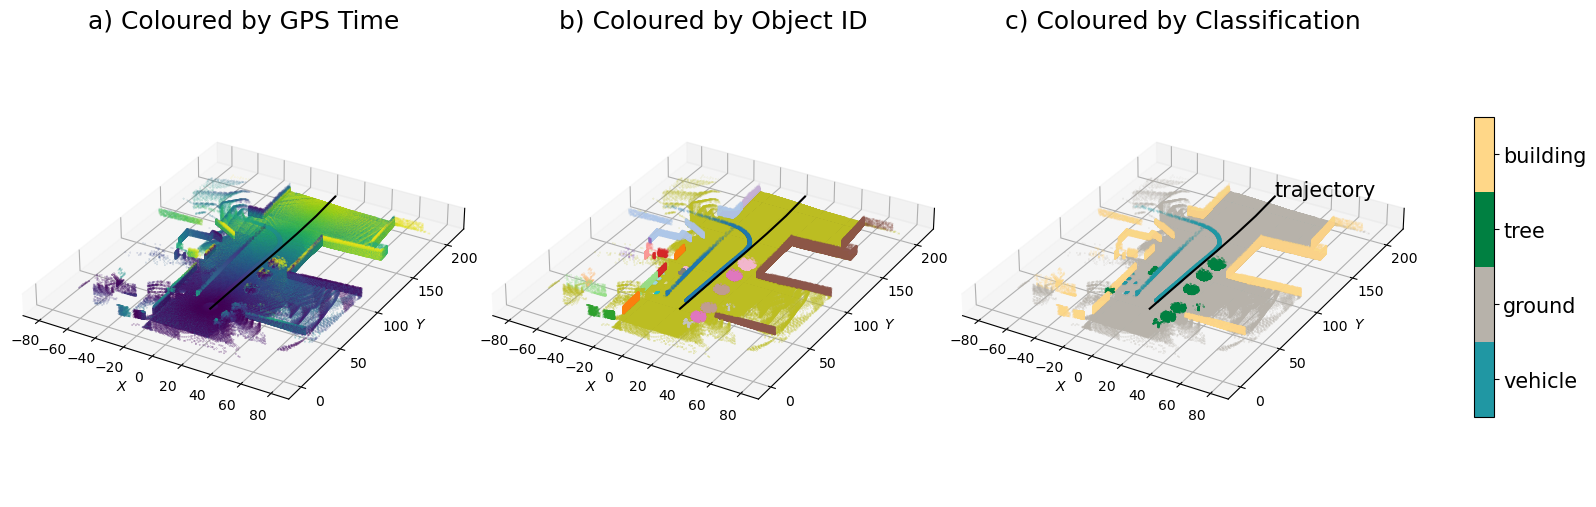

In [12]:
# Matplotlib figure
fig = plt.figure(figsize=(20, 6))

# Scatter plot point cloud (coloured by GPSTime).
ax = fig.add_subplot(1,3,1, projection='3d', computed_zorder=False)
sc = ax.scatter(pc_clipped[::10, 0],
                pc_clipped[::10, 1],
                pc_clipped[::10, 2],
                c=gps_time_clipped[::10],
                s=0.02, zorder=1)

# Plot of trajectory.
ax.plot(traj[::5, 0], traj[::5, 1], traj[::5, 2], c='black', lw=1.5, zorder=2)

# Add axis labels.
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zticks([])
# set equal axes
box = (np.ptp(pc_clipped[:, 0]), np.ptp(pc_clipped[:, 1]), np.ptp(pc_clipped[:, 2]))
ax.set_box_aspect(box)

# Set title.
ax.set_title(label='a) Coloured by GPS Time', fontsize=18)

# Second subplot
ax2 = fig.add_subplot(1,3,2, projection='3d', computed_zorder=False)
sc2 = ax2.scatter(pc_clipped[::10, 0],
                  pc_clipped[::10, 1],
                  pc_clipped[::10, 2],
                  c=object_id_clipped[::10], cmap='tab20',
                  s=0.02, zorder=1)
ax2.plot(traj[::5, 0], traj[::5, 1], traj[::5, 2], c='black', lw=1.5, zorder=2)

ax2.set_xlabel('$X$')
ax2.set_ylabel('$Y$')
ax2.set_zticks([])
ax2.set_box_aspect(box)
ax2.set_title(label='b) Coloured by Object ID', fontsize=18)

# Third subplot
from matplotlib.colors import LinearSegmentedColormap
colours = ['#2097A3', '#B7B2AA', '#008041', '#FFD788']
class_cmap = LinearSegmentedColormap.from_list('classification', colours, N=4)

ax3 = fig.add_subplot(1,3,3, projection='3d', computed_zorder=False)
sc3 = ax3.scatter(pc_clipped[::10, 0],
                  pc_clipped[::10, 1],
                  pc_clipped[::10, 2],
                  c=classification_clipped[::10], cmap=class_cmap,
                  s=0.02, zorder=1)
ax3.plot(traj[::5, 0], traj[::5, 1], traj[::5, 2], c='black', lw=1.5, zorder=2)

ax3.set_xlabel('$X$')
ax3.set_ylabel('$Y$')
ax3.set_zticks([])
ax3.set_box_aspect(box)
ax3.set_title(label='c) Coloured by Classification', fontsize=18)
ax3.text(traj[-1, 0], traj[-1, 1], traj[-1, 2], 'trajectory', fontsize=15)

# Adjust subplots
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.02, hspace=0.02)
# Add color bar and set ticks and tick labels
cb_ax = fig.add_axes([0.83, 0.25, 0.01, 0.5])
tick_locs = [0.75, 2.25, 3.75, 5.25]
cbar = fig.colorbar(sc3, cax=cb_ax, ticks=tick_locs)
cbar.ax.set_yticklabels(['vehicle', 'ground', 'tree', 'building'], fontsize=15)

# Display results
plt.show()

We can see that the two moving vehicles (coloured in blue in subplots b and c) stay in the field of view of the scanner for several seconds. The point cloud clearly shows their trajectory along the road. Looking at subplot a, which is coloured by time, we can also see that the vehicles move in opposite direktions, as their colour gradients are diverging.

Let's have another look at just the vehicles in a shorter time span.

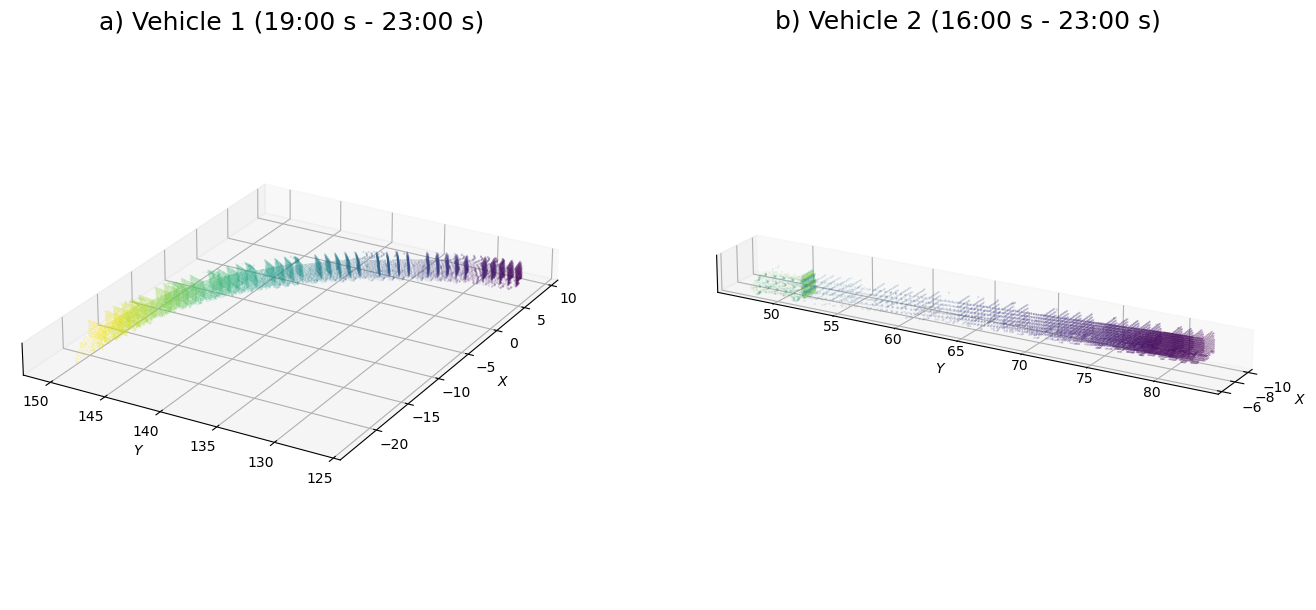

In [13]:
t1 = [19, 23]
idx1 = (gps_time_clipped > t1[0]) & (gps_time_clipped < t1[1]) & (object_id_clipped == 0)
pc_sub = pc_clipped[idx1]
gps_time_sub = gps_time_clipped[idx1]
object_id_sub = object_id_clipped[idx1]
classification_sub = classification_clipped[idx1]

t2 = [16, 23]
idx2 = (gps_time_clipped > t2[0]) & (gps_time_clipped < t2[1]) & (object_id_clipped == 1)
pc_sub2 = pc_clipped[idx2]
gps_time_sub2 = gps_time_clipped[idx2]
object_id_sub2 = object_id_clipped[idx2]
classification_sub2 = classification_clipped[idx2]

fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(1,2,1, projection='3d', computed_zorder=False)
sc = ax.scatter(pc_sub[:, 0],
                pc_sub[:, 1],
                pc_sub[:, 2],
                c=gps_time_sub,
                s=0.02, zorder=1)
ax.set_xlabel('$X$', labelpad=10)
ax.set_ylabel('$Y$', labelpad=10)
ax.set_zticks([])
ax.set_title(label=f'a) Vehicle 1 ({t1[0]}:00 s - {t1[1]}:00 s)', fontsize=18)
box = (np.ptp(pc_sub[:, 0]), np.ptp(pc_sub[:, 1]), np.ptp(pc_sub[:, 2]))
ax.set_box_aspect(box)
ax.view_init(elev=25., azim=210)

ax2 = fig.add_subplot(1,2,2, projection='3d', computed_zorder=False)
sc2 = ax2.scatter(pc_sub2[:, 0],
                 pc_sub2[:, 1],
                 pc_sub2[:, 2],
                 c=gps_time_sub2,
                 s=0.02, zorder=1)
ax2.set_xlabel('$X$')
ax2.set_ylabel('$Y$', labelpad=70)
ax2.set_zticks([])
ax2.set_xticks([-6, -8, -10])
ax2.set_title(label=f'b) Vehicle 2 ({t2[0]}:00 s - {t2[1]}:00 s)', fontsize=18)
box = (np.ptp(pc_sub2[:, 0]), np.ptp(pc_sub2[:, 1]), np.ptp(pc_sub2[:, 2]))
ax2.set_box_aspect(box)
ax2.view_init(elev=20., azim=30)